# Линейная регрессия

План:
- Регрессия
- Классификация

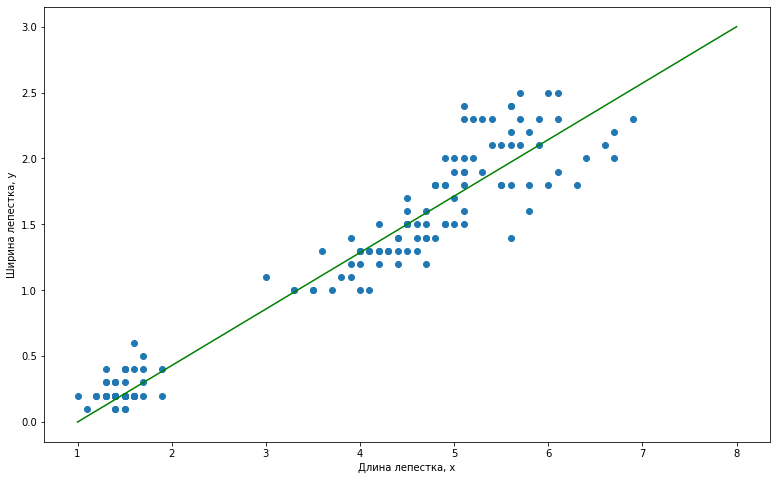

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
data = datasets.load_iris()
X = data['data']
plt.figure(figsize=(13,8))
plt.scatter(X[:,2], X[:,3])
# plt.xlim((0,8))
# plt.ylim((0,3))
plt.xlabel('Длина лепестка, x')
plt.ylabel('Ширина лепестка, y')
plt.plot(np.array([1,8]), np.array([0,3]), 'g')

На рисунке представлен пример линейной регрессии, который демонстрирует зависимость одной переменной (по оси $y$) от другой переменной (по оси $x$).Чтобы соответствующая данному примеру система линейных уравнений имела решение, все точки должны лежать точно на одной прямой. Но это не так. А не лежат они на одной прямой именно из-за шума (или из-за того что предположение о наличии линейной зависимости было ошибочным). Таким образом, чтобы восстановить линейную зависимость по реальным данным обычно требуется ввести еще одно предположение: входные данные содержат шум и этот шум имеет нормальное распределение.

***Регрессия*** - метод восстановления завимости между имеющимися данными.

$$y = \omega_1 + \omega_2 x + \varepsilon $$

где $x$ - некоторый признак, $y$ - целевая переменная, которую требуется предсказать, $\omega$ - весовые коэффициенты и $\epsilon$ - шум в данных.

Задача регрессии - найти прямую, которая наиулучшим образом описывает данные.

Задачу регрессии в общем виде (для многомерного случая) можно записать следующим образом:

$$y_i = \sum_{j=0}^M \omega_j x_{ij} + \varepsilon$$

либо в матричном виде:

$$Y_{N \times 1} = X_{N \times M} W_{M \times 1} + \varepsilon$$

где $\omega_j$ - весовые коэффициенты, X - матрица данных, y - целевая переменная.

Итак, в нашем случае получается некоторая система линейных уравнений (СЛУ), как правило несовместная, так как в ней количество уравнений превосходит количество неизвестных. Поэтому говорить о ее точном решении невозможно.

Невязка $Y - XW = \varepsilon$. Цель: найти такое $W$, при котором невязка будет минимальна.

Частный случай ***полиномиальная регрессия***:

$$y_i = \sum_{j=0}^M \omega_j x_{i}^j + \varepsilon$$

Позволяет отыскивать полиномиальные зависмости в данных.


## Метод максимального правдоподобия (Maximum likelihood estimation)
Метод заключается в выборе функции (и ее максимизации), которая лучше всего подходит под данное распределение.
Выше мы сделали предположение, что шум распределен нормально, а прямая описывающая наше распределение проходит по его математическому ожиданию. Максимизируем следующую функцию:

$$P(\mu | X, \sigma^2) = \prod_{x \in X}\frac{1}{\sqrt{2 \pi \sigma^2}} \exp^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

Заменим $\mu$ и $X$ в нашем распределении:

$$P(\omega | x, y, \sigma^2) = \prod_{i \in [1,m]}\frac{1}{\sqrt{2 \pi \sigma^2}} \exp^{-\frac{(y_i - \omega x_i)^2}{2 \sigma^2}}$$

И будем максимизировать натуральный логорифм нашей функции, так как произведение максимизировать сложно. Он будет принимать макисмальное значение там же, где и функция:

$$f(\omega) = \ln(\prod_{i \in [1,m]}\frac{1}{\sqrt{2 \pi \sigma^2}} \exp^{-\frac{(y_i - \omega x_i)^2}{2 \sigma^2}}) = \sum_{i \in [1,m]}\frac{1}{\sqrt{2 \pi \sigma^2}} - \sum_{i \in [1,m]}\frac{(y_i - \omega x_i)^2}{2 \sigma^2}$$

Отметим, что первый член константа, тогда максимизация $f(\omega)$ сводится к минимизации следующего члена:

$$\sum_{i \in [1,m]}(y_i - \omega x_i)^2$$

Называется методом наименьших квадратов:

$$\varepsilon^2 = \|Y - W^T X \|_2^2 = (Y - W^T X)^T (Y - W^T X) \to \min$$

$$\frac{\partial \varepsilon^2}{\partial W} = \frac{\partial (y^T y - 2 y^T X W + W^T X^T X W)}{\partial W} = (-2X^T y +2X^TXW) = 0$$

Уравнение метода наименьших квадратов:

$$W = (X^T X)^{-1} X^T y = X^+y$$

где $X^+$ - псевдообратная матрица.

## Метод наименьших квадратов
### Обычный МНК

$$W = (X^T X)^{-1} X^T y$$

### Взвешенный МНК

$$W = (X^T A X)^{-1} X^T A y$$

где $A$ - произвольная диагональная матрица с весовыми коэффициентами.
Метод используется, когда дисперсия различна для разных подвыборок из $X$.

### Обобщенный МНК

$$W = (X^T A X)^{-1} X^T A y$$

$$\varepsilon^2 = (Y - W^T X)^T A (Y - W^T X) \to \min$$

## Проблемы МНК
### Обусловленность матрицы
В области численного анализа число обусловленности функции по отношению к аргументу измеряет, насколько может измениться выходное значение функции при небольшом изменении входного аргумента. Это используется, чтобы измерить, насколько чувствительна функция к изменениям или ошибкам на входе, и на сколько ошибка на выходе является результатом ошибки на входе. Очень часто решается обратная задача — зная $f(x)=y$, найти $x$, и поэтому должно использоваться число обусловленности (локальной) обратной задачи. В линейной регрессии число обусловленности может использоваться в качестве диагностики для мультиколлинеарности.

***Мультиполлинеарность***
Полная коллинеарность (линейная зависимость) приводит к неопределенности параметров в линейной регрессиионной модели независимо от методов оценки. Рассмотрим это на примере следующей линейной модели:

$$y = \omega_1 x_1 + \omega_2 x_2 + \omega_3 x_3 + \varepsilon$$

Предположим, что признаки имеют линейную зависимость $x_1 = x_2 + x_3$. Добавим произвольное число $a$ к первому коэффициенту и вычтем это же число из других коэффициентов.

$$y = (\omega_1 + a) x_1 + (\omega_2 - a) x_2 + (\omega_3 - a) x_3 = \\  \omega_1 x_1 + \omega_2 x_2 + \omega_3 x_3 + a (x_1 - x_2 - x_3) = \omega_1 x_1 + \omega_2 x_2 + \omega_3 x_3$$

Таким образом, несмотря на относительно произвольное изменение коэффициентов модели мы получили ту же модель. Такая модель принципиально неидентифицируема. Неопределенность существует уже в самой модели. Если рассмотреть 3-мерное пространство коэффициентов, то в этом пространстве вектор истинных коэффициентов в данном случае не единственный, а представляет собой целую прямую линию! Любая точка этой прямой — истинный вектор коэффициентов.

В связи с этим проблема полной коллинеарности факторов решается уже на стадии отбора переменных при моделировании и поэтому к проблеме качества эконометрических оценок параметров отношения не имеет. На практике чаще возникает другая ситуация — сильная корреляция между факторами.

### Неусточивость к выбросам

### Вычислительная сложность
Обращение матрицы — сложная операция с кубической сложностью от количества признаков. Если в выборке тысячи признаков, то вычисления могут стать слишком трудоёмкими. Решить эту проблему можно путём использования численных методов оптимизации.

Матрица $X^T X$ может быть вырожденной (определитель равено 0 → нет обратной матрицы) или плохо обусловленной. В этом случае обращение либо невозможно, либо может привести к неустойчивым результатам. Проблема решается с помощью регуляризации.

## Регуляризация линейных моделей
### Переобучение
Регуляризация — это метод для уменьшения степени переобучения модели, а значит, прежде чем мы разберемся, что такое регуляризация, нужно понять суть переобучения (overfitting). 

Переобучение дает неплавные кривые прогнозирования, т. е. «нерегулярные». Такие плохие сложные кривые прогнозирования обычно характеризуются весовыми значениями, которые имеют очень большие или очень малые величины. Поэтому один из способов уменьшить степень переобучения состоит в том, чтобы не допускать очень малых или больших весовых значений для модели. В этом и заключается суть регуляризации.

In [2]:
np.random.random()

0.18511025062235198

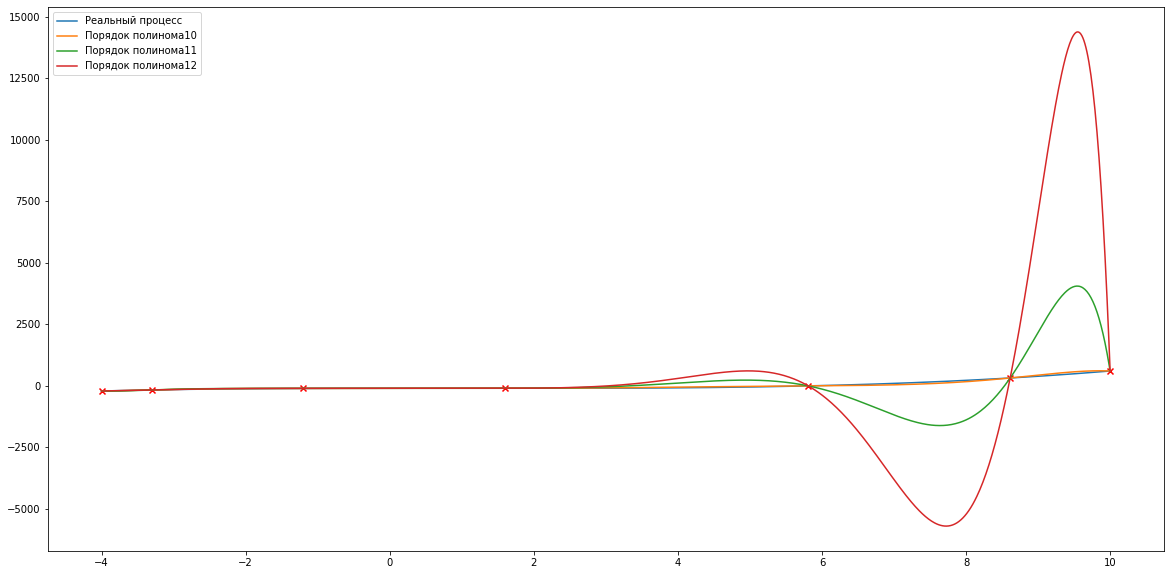

In [4]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
x = np.linspace(-4,10,1000)
y_real = x**3 - 3*x**2 -100
# x_train = np.linspace(0.2,4,7)
# y_train = np.log(x_train)
# x = x - x.mean()
# y_real = y_real - y_real.mean()
x_train = x[np.array([0, 50, 200, 400, 700, 900, -1])]
y_train = y_real[np.array([0, 50, 200, 400, 700, 900, -1])]

plt.figure(figsize=(20,10))

plt.plot(x, y_real, '-', label='Реальный процесс')
plt.scatter(x_train, y_train, marker='x', c='r', label='')

for it in range(10,13, 1):
    poly = PolynomialFeatures(degree=it)
    x_poly_train = poly.fit_transform(x_train.reshape(-1, 1))
    regr = LinearRegression(True)
    regr.fit(x_poly_train, y_train)
    y_regr = regr.predict(poly.transform(x.reshape(-1,1)))
    plt.plot(x, y_regr, '-', label = 'Порядок полинома' + str(it))
plt.legend()

### L1 и L2 регуляризации
Чтобы величины весовых значений модели не становились большими, процесс регуляризации штрафует весовые значения добавляя их в вычисление ошибки. Если весовые значения включаются в общую ошибку, которая минимизируется, тогда меньшие весовые значения будут давать меньшие значения ошибки. L1-регуляризация штрафует весовые значения добавлением суммы их абсолютных значений к ошибке.

L2-регуляризация выполняет аналогичную операцию добавлением суммы их квадратов к ошибке.

$$J_{RIDGE} = \sum_{i=1}^{N} (y_i - \hat y_i)^2 + \lambda \| \omega \|_2^2$$

$$J_{LASSO} = \sum_{i=1}^{N} (y_i - \hat y_i)^2 + \lambda \| \omega \|_1$$

# Оптимизационный подход. Метод градиентного спуска

- Начальная инициализация весов. Инициализировать все веса не очень большими случайными числами.

- Пересчитывать веса из приближения полученного на предыдущем шаге, то есть вычитать вектор градиента в соответсвующей точке на некоторый коэффициент.

$$\omega^t = \omega^{t-1} - \eta \nabla Q(w^{t-1}, X)$$

- Выполнять итерационный процесс до тех пор, пока не наступает сходимость:

$$\| \omega^t - \omega^{t-1} \| < \epsilon$$


Функционал ошибки можно записать следующим образом:
$$\varepsilon(\omega_0, \omega_1, X) = \frac{1}{l} \sum_{i=1}^{l} \omega_1 x_i + \omega_0 - y_i $$

Для случая с одним признаком:
$$\frac{\partial Q}{\partial \omega_1} = \frac{2}{l} \sum_{i=1}^{l} (\omega_1 x_i + \omega_0 - y_i) x_i, \frac{\partial Q}{\partial \omega_0} = \frac{2}{l} \sum_{i=1}^{l} (\omega_1 x_i + \omega_0 - y_i) $$

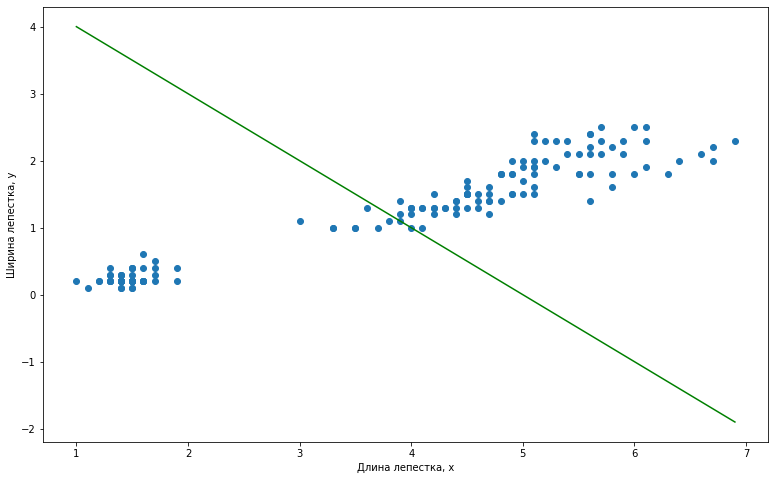

In [5]:
plt.figure(figsize=(13,8))
plt.scatter(X[:,2], X[:,3])
plt.xlabel('Длина лепестка, x')
plt.ylabel('Ширина лепестка, y')
w0 = 5
w1 = -1
xLine = np.linspace(X[:,2].min(), X[:,2].max(), 100)
yLine = [w1 * x + w0 for x in xLine]
plt.plot(xLine, yLine, 'g')

In [6]:
step = 0.001
l = len(X[:,2])

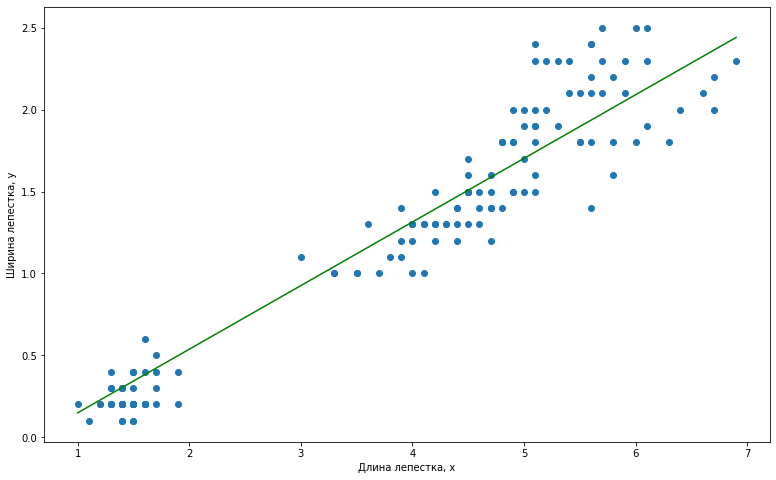

In [17]:
for it in range(1000):
    w1 -= step * 2 / l * sum((w1 * X[:,2] + w0 - X[:,3]) * X[:,2]) 
    w0 -= step * 2 / l * sum(w1 * X[:,2] + w0 - X[:,3])
#     print(w1, w0)
plt.figure(figsize=(13,8))
plt.scatter(X[:,2], X[:,3])
plt.xlabel('Длина лепестка, x')
plt.ylabel('Ширина лепестка, y')
yLine = [w1 * x + w0 for x in xLine]
plt.plot(xLine, yLine, 'g')

# Линейная классификация

Задача классификации состоит в построении некоторой разделяющей поверхности, которая разобьет выборку на отедльные подвыборки с классами

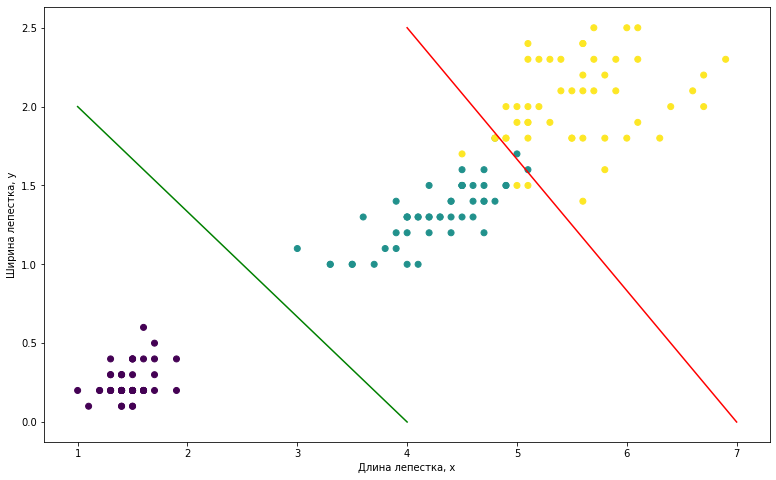

In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
data = datasets.load_iris()
X = data['data']
Y = data['target']
plt.figure(figsize=(13,8))
plt.scatter(X[:,2], X[:,3], c = Y)

plt.xlabel('Длина лепестка, x')
plt.ylabel('Ширина лепестка, y')
plt.plot(np.array([1,4]), np.array([2,0]), 'g')
plt.plot(np.array([4,7]), np.array([2.5,0]), 'r')

## Функционал ошибки
$$Q(y,\hat y) = \frac{1}{N} \sum_{i=1}^{N}[y_i \neq \hat y_i]$$

Однако такой функционал не гладкий оптимизировать по ней невозможно.

$$Q(y,X) = \frac{1}{N} \sum_{i=1}^{N}[y_i \langle \omega, x_i \rangle < 0]$$
$$Q(y,X) = \frac{1}{N} \sum_{i=1}^{N}[M_i < 0]$$

Это тоже разрывная функция, по ней можно использовать методы негладкой оптимизации, но это сложно.
В этой связи, возьмем любую гладкую оценку пороговой функции.

$$[M < 0] \leq \bar L(M)$$
$$Q(y,X) \leq \bar Q(y,X) = \frac{1}{N} \sum_{i=1}^{N} \bar L(M_i)$$

## Примеры оценок
Логистическая:

$$\bar L(M) = \ln(1+ \exp(-M))$$

Экспоненциальны:

$$\bar L(M) = \exp(-M)$$

Кусочно-линейная:

$$\bar L(M) = max(0, 1-M))$$

## Точность
$$Q(y,\hat y) = \frac{1}{N} \sum_{i=1}^{N}[y = \hat y]$$

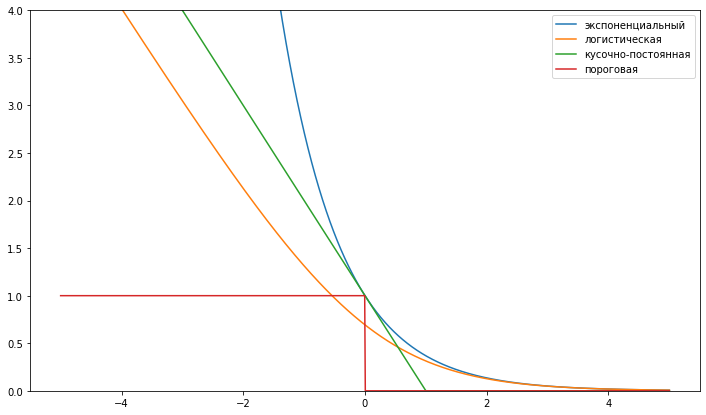

In [133]:
x = np.linspace(-5, 5, 1000)
y_exp = np.exp(-x)
y_log = np.log(1 + np.exp(-x))
y_lin = [max(0, 1 - i) for i in x] 
y_thr = x < 0
plt.figure(figsize=(12,7))
plt.ylim([0,4])
plt.plot(x, y_exp, label='экспоненциальный')
plt.plot(x, y_log, label='логистическая')
plt.plot(x, y_lin, label='кусочно-постоянная')
plt.plot(x, y_thr, label='пороговая')
plt.legend()